In [4]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,50 mins 04 secs
H2O_cluster_timezone:,Europe/Istanbul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 months and 18 days
H2O_cluster_name:,H2O_from_python_SERENAY_nn94ts
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.867 Gb
H2O_cluster_total_cores:,20
H2O_cluster_allowed_cores:,20
H2O_cluster_status:,"locked, healthy"


In [7]:
# Veri Setinin ilk beş satırı
import pandas as pd
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
# Boyut
print(f"Veri seti boyutu: {df.shape}")

# Değişken tipleri ve eksik veri durumu
df.info()

Veri seti boyutu: (918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
# Sayısal değişkenlerin istatistiksel özeti
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
# Eksik değer kontrolü
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

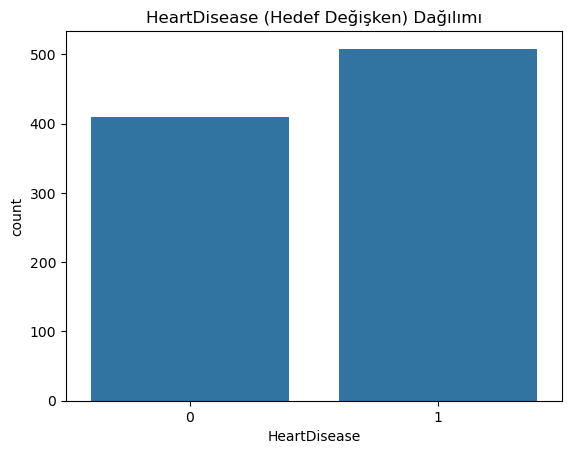

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="HeartDisease", data=df)
plt.title("HeartDisease (Hedef Değişken) Dağılımı")
plt.show()

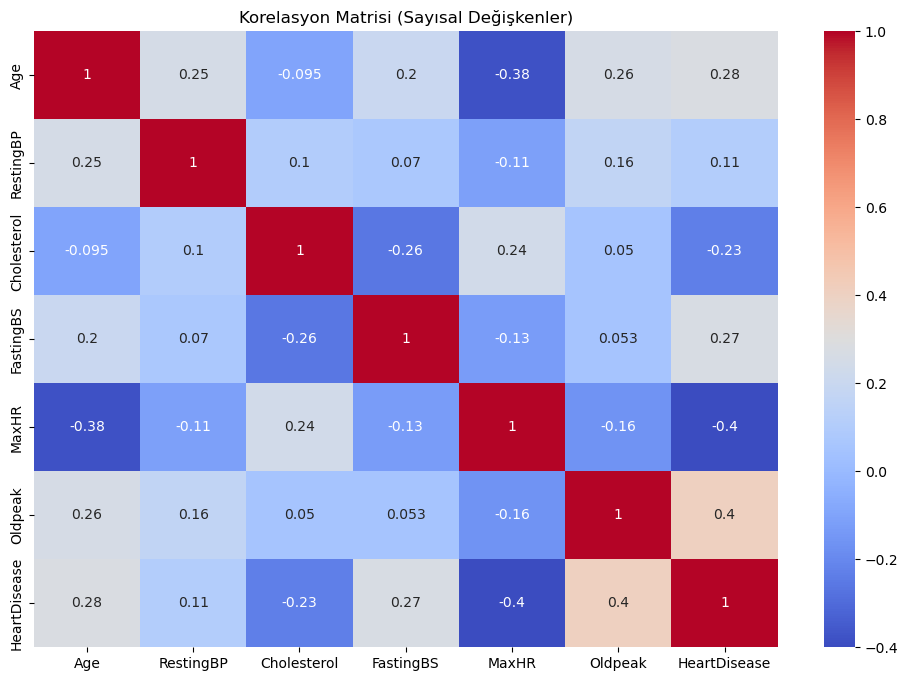

In [12]:
# Sadece sayısal değişkenlerle korelasyon matrisi
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi (Sayısal Değişkenler)")
plt.show()

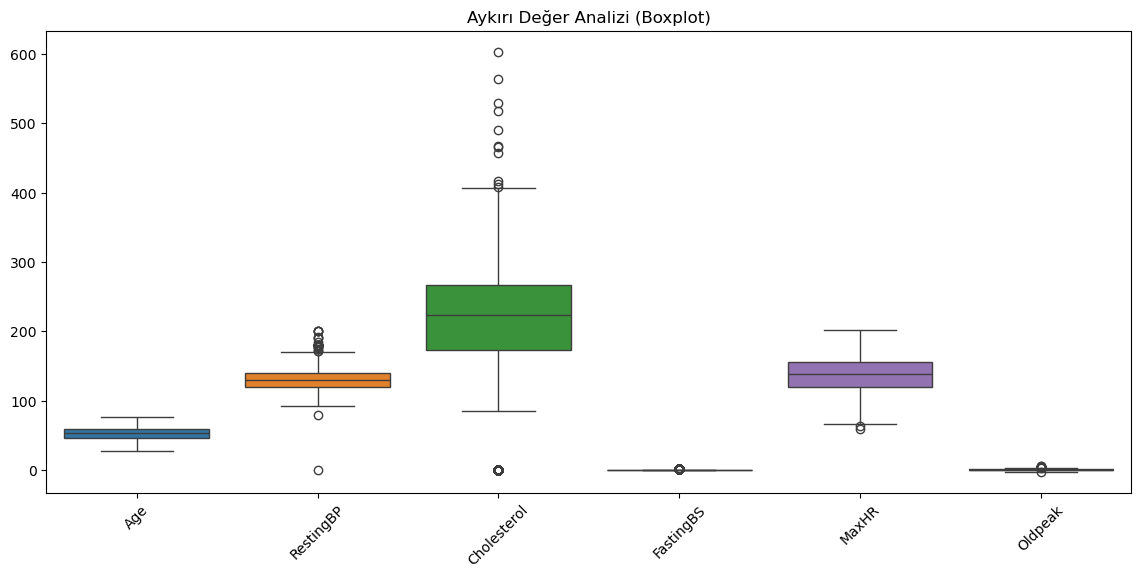

In [13]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.drop(columns=["HeartDisease"]))
plt.xticks(rotation=45)
plt.title("Aykırı Değer Analizi (Boxplot)")
plt.show()

In [16]:
data = h2o.import_file("heart.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [18]:
# H2O veri setinde hedef değişkeni kategorik yapıyoruz
data['HeartDisease'] = data['HeartDisease'].asfactor()

In [20]:
type(data)

h2o.frame.H2OFrame

In [22]:
data['HeartDisease'] = data['HeartDisease'].asfactor()

In [24]:
train, test = data.split_frame(ratios=[0.8], seed=1234)

In [25]:
x = data.columns
y = "HeartDisease"
x.remove(y)

In [26]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models=10, seed=1, verbosity="info")
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |█Failed polling AutoML progress log: Server error java.lang.IllegalArgumentException:
  Error: No enum constant water.logging.LoggingLevel.info
  Request: GET /99/AutoML/AutoML_3_20250715_162743@@HeartDisease
    params: {'verbosity': 'info'}

██████████████████████████████████████████████████████████████| (done) 100%
Failed polling AutoML progress log: Server error java.lang.IllegalArgumentException:
  Error: No enum constant water.logging.LoggingLevel.info
  Request: GET /99/AutoML/AutoML_3_20250715_162743@@HeartDisease
    params: {'verbosity': 'info'}



key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/10
# GBM base models (used / total),6/6
# DRF base models (used / total),1/2
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [27]:
leader = aml.leader
perf = leader.model_performance(test)

print(perf)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.08992875305783343
RMSE: 0.29988123158649566
LogLoss: 0.30955136609667055
AUC: 0.9381720430107527
AUCPR: 0.9260910990931243
Gini: 0.8763440860215055
Null degrees of freedom: 180
Residual degrees of freedom: 171
Null deviance: 252.55594019381334
Residual deviance: 112.05759452699473
AIC: 132.05759452699473

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42211393519583856
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      74   14   0.1591   (14.0/88.0)
1      6    87   0.0645   (6.0/93.0)
Total  80   101  0.1105   (20.0/181.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.422114     0.896907  100
max f2                       0.322503     0.942029  110
max f0point5                 0.773136     0.897756  76
max accuracy

In [28]:
from h2o.automl import H2OAutoML

# 1. Giriş ve hedef değişkenleri belirle
x = data.columns[:-1]  # Tüm sütunlar, sonuncusu hariç
y = "HeartDisease"     # Hedef sütun

# 2. AutoML nesnesi oluştur
aml = H2OAutoML(max_models=10, seed=1, verbosity="info")

# 3. Modeli eğit
aml.train(x=x, y=y, training_frame=train)

# 4. Performans değerlendirmesi için test seti üzerinde tahmin yap
perf = aml.leader.model_performance(test_data=test)

# 5. Metikleri yazdır
print("Accuracy:", perf.accuracy()[0][1])
print("Precision:", perf.precision()[0][1])
print("Recall:", perf.recall()[0][1])
print("F1 Score:", perf.F1()[0][1])


AutoML progress: |█Failed polling AutoML progress log: Server error java.lang.IllegalArgumentException:
  Error: No enum constant water.logging.LoggingLevel.info
  Request: GET /99/AutoML/AutoML_4_20250715_162847@@HeartDisease
    params: {'verbosity': 'info'}

██████████████████████████████████████████████████████████████| (done) 100%
Failed polling AutoML progress log: Server error java.lang.IllegalArgumentException:
  Error: No enum constant water.logging.LoggingLevel.info
  Request: GET /99/AutoML/AutoML_4_20250715_162847@@HeartDisease
    params: {'verbosity': 'info'}

Accuracy: 0.8895027624309392
Precision: 1.0
Recall: 1.0
F1 Score: 0.900990099009901


In [29]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_4_20250715_162847,0.931093,0.323705,0.937127,0.131052,0.31202,0.0973564
StackedEnsemble_AllModels_1_AutoML_4_20250715_162847,0.930985,0.324593,0.936822,0.132257,0.312584,0.0977087
GBM_2_AutoML_4_20250715_162847,0.930304,0.32717,0.932205,0.148668,0.315537,0.0995636
GBM_grid_1_AutoML_4_20250715_162847_model_1,0.93012,0.327197,0.930843,0.132927,0.313231,0.0981135
GBM_3_AutoML_4_20250715_162847,0.92993,0.32776,0.935366,0.147089,0.315692,0.0996615
GBM_4_AutoML_4_20250715_162847,0.929058,0.328041,0.932439,0.15006,0.315671,0.0996484
GBM_1_AutoML_4_20250715_162847,0.927595,0.336342,0.935222,0.134828,0.31922,0.101901
GBM_5_AutoML_4_20250715_162847,0.926364,0.340722,0.933771,0.156941,0.323591,0.104711
DRF_1_AutoML_4_20250715_162847,0.925294,0.505644,0.925975,0.13812,0.321784,0.103545
XRT_1_AutoML_4_20250715_162847,0.923019,0.359515,0.921575,0.14053,0.325795,0.106142
